Untuk memperoleh solusi numerik dengan metode Runge-Kutta orde 4

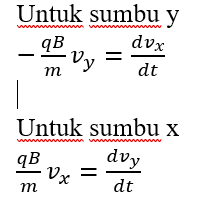

dengan asumsi q = 1, Bz = 1T , dan m = 1 kg


In [9]:
#definisikan Runge-Kutta Orde 4
def RungeKutta4(F,t,x,y,h):
        K0 = h*F(t, x, y)
        K1 = h*F(t + h/2, x + K0/2, y)
        K2 = h*F(t + h/2, x + K1/2, y)
        K3 = h*F(t + h, x + K2, y)
        return (K0 + 2*K1 + 2*K2 + K3)/6

#definisikan persamaan diferensial terkopel
def vx_dot(t, vx, vy, q=1, Bz=1, m=1):
    return -q*Bz/m*vy

def vy_dot(t, vy, vx, q=1, Bz=1, m=1):
    return q*Bz/m*vx

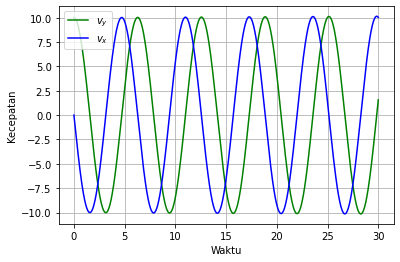

In [12]:
import matplotlib.pyplot as plt

#definisikan nilai parameter
vx_0 = 0
vy_0 =10
t0 =0
tf = 30
h = 0.001

vxs=[vx_0]
vys=[vy_0]
ts=[t0]

while ts[-1] < tf :
    h = min(h,tf-ts[-1])
    vx = vxs[-1]+ RungeKutta4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1]+ RungeKutta4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)
    
#plokt kecepatan pada kedua arah terhadap waktu
plt.figure()
plt.plot(ts, vys, color='green')
plt.plot(ts, vxs, color='blue')
plt.xlabel('Waktu') ; plt.ylabel('Kecepatan')
plt.legend(['$v_y$','$v_x$'])
plt.grid(True)

plt.show()